# Data cleaning

### Data brute

- 1 dataset kaggle : All_seasons
- 1 dossier kaggle : 16 dataset
- Partie Keira : Scrapping 

In [28]:
#Importations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [9]:
pd.set_option('display.max_columns', None)

## 1. All_seasons

### Aperçu initial

In [10]:
df_all_seasons = pd.read_csv('All_seasons (1).csv')
df_all_seasons.drop(columns=['Unnamed: 0'], inplace=True)
df_all_seasons.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [11]:
df_all_seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   college            10990 non-null  object 
 6   country            12844 non-null  object 
 7   draft_year         12844 non-null  object 
 8   draft_round        12844 non-null  object 
 9   draft_number       12844 non-null  object 
 10  gp                 12844 non-null  int64  
 11  pts                12844 non-null  float64
 12  reb                12844 non-null  float64
 13  ast                12844 non-null  float64
 14  net_rating         12844 non-null  float64
 15  oreb_pct           12844 non-null  float64
 16  dreb_pct           128

In [12]:
df_all_seasons.describe(include='all')

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
count,12844,12844,12844.000000,12844.000000,12844.000000,10990,12844,12844,12844,12844,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844
unique,2551,36,NaN,NaN,NaN,356,82,48,9,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
top,Vince Carter,CLE,NaN,NaN,NaN,Kentucky,USA,Undrafted,1,Undrafted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-22
freq,22,450,NaN,NaN,NaN,447,10721,2358,7351,2414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605
mean,NaN,NaN,27.045313,200.555097,100.263279,NaN,NaN,NaN,NaN,NaN,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595,NaN
std,NaN,NaN,4.339211,9.111090,12.426628,NaN,NaN,NaN,NaN,NaN,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172,NaN
min,NaN,NaN,18.000000,160.020000,60.327736,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,24.000000,193.040000,90.718400,NaN,NaN,NaN,NaN,NaN,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000,NaN
50%,NaN,NaN,26.000000,200.660000,99.790240,NaN,NaN,NaN,NaN,NaN,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000,NaN
75%,NaN,NaN,30.000000,208.280000,108.862080,NaN,NaN,NaN,NaN,NaN,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000,NaN


### Analyse des valeurs manquantes

In [18]:
missing_percent = df_all_seasons.isnull().mean().round(4) * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))


college    14.43
dtype: float64


In [19]:
# Remplacement des valeurs manquantes dans la colonne 'college'
df_all_seasons['college'] = df_all_seasons['college'].fillna("Unknown")

### Doublons

In [20]:
# Nombre de doublons
print("Doublons :", df_all_seasons.duplicated().sum())

# Suppression si besoin
df_all_seasons.drop_duplicates(inplace=True)


Doublons : 0


### Correction des types

In [21]:
df_all_seasons['season'] = df_all_seasons['season'].astype("category")
df_all_seasons['team_abbreviation'] = df_all_seasons['team_abbreviation'].astype("category")
df_all_seasons['country'] = df_all_seasons['country'].astype("category")
df_all_seasons['draft_year'] = df_all_seasons['draft_year'].astype("category")
df_all_seasons['draft_round'] = df_all_seasons['draft_round'].astype("category")
df_all_seasons['draft_number'] = df_all_seasons['draft_number'].astype("category")


### Détection des valeurs aberrantes

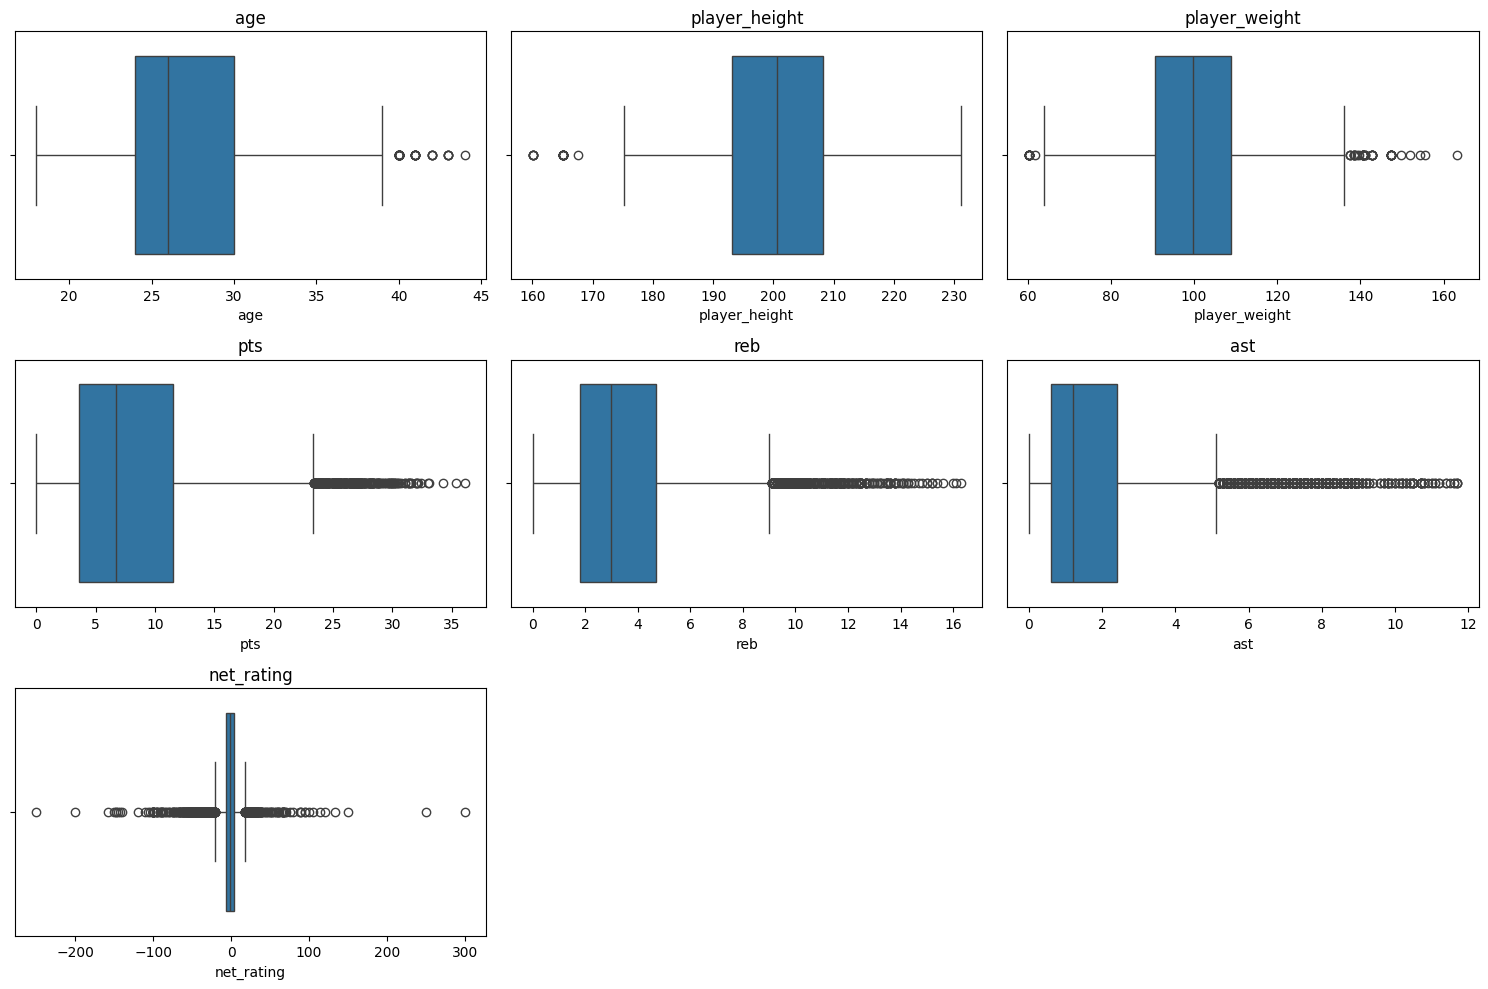

In [22]:
# Visualisation avec des boxplots
num_cols = ['age', 'player_height', 'player_weight', 'pts', 'reb', 'ast', 'net_rating']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_all_seasons[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [23]:
# Suppression des valeurs extrêmes de net_rating
df_all_seasons = df_all_seasons[(df_all_seasons['net_rating'] > -100) & (df_all_seasons['net_rating'] < 100)]


### Nettoyage des noms de colonnes

In [24]:
df_all_seasons.columns = df_all_seasons.columns.str.strip().str.lower().str.replace(' ', '_')


In [34]:
df_all_seasons.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [128]:
df_all_seasons.to_csv('df_all_seasons_cleaned.csv', index=False)

## 2. Common player

In [37]:
df_common_players = pd.read_csv('csv/common_player_info.csv')
df_common_players.head()

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,last_affiliation,height,weight,season_exp,jersey,position,rosterstatus,games_played_current_season_flag,team_id,team_name,team_abbreviation,team_code,team_city,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,Duke/USA,6-10,240.0,5.0,30,Forward,Inactive,N,1610612757,Trail Blazers,POR,blazers,Portland,HISTADD_alaa_abdelnaby,1990.0,1994.0,N,Y,Y,1990,1,25,N
1,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,UCLA/USA,7-2,225.0,20.0,33,Center,Inactive,N,1610612747,Lakers,LAL,lakers,Los Angeles,HISTADD_kareem_abdul-jabbar,1969.0,1988.0,N,Y,Y,1969,1,1,Y
2,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03 00:00:00,San Jose State,France,San Jose State/France,6-6,235.0,7.0,9,Forward-Guard,Inactive,N,1610612758,Kings,SAC,kings,Sacramento,tariq_abdul-wahad,1997.0,2003.0,N,Y,Y,1997,1,11,N
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,California/USA,6-9,245.0,13.0,3,Forward,Inactive,N,1610612763,Grizzlies,VAN,grizzlies,Vancouver,shareef_abdur-rahim,1996.0,2007.0,N,Y,Y,1996,1,3,N
4,76005,Tom,Abernethy,Tom Abernethy,"Abernethy, Tom",T. Abernethy,tom-abernethy,1954-05-06 00:00:00,Indiana,USA,Indiana/USA,6-7,220.0,5.0,5,Forward,Inactive,N,1610612744,Warriors,GOS,warriors,Golden State,HISTADD_tom_abernethy,1976.0,1980.0,N,Y,Y,1976,3,43,N


In [38]:
df_common_players.describe(include='all')

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,last_affiliation,height,weight,season_exp,jersey,position,rosterstatus,games_played_current_season_flag,team_id,team_name,team_abbreviation,team_code,team_city,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
count,4.171000e+03,4171,4171,4171,4171,4171,4171,4171,4156,4170,4171,4075,4071.000000,4171.000000,3191,4108,4171,4171,4.171000e+03,3469,3469,3469,3469,4170,4156.000000,4156.000000,4171,4171,4171,4171,4007,3948,4171
unique,NaN,1434,2576,4139,4139,3686,4139,3895,643,73,859,27,NaN,NaN,106,7,2,1,NaN,50,69,43,54,4158,NaN,NaN,2,2,2,77,20,162,2
top,NaN,John,Williams,Charles Smith,"Smith, Charles",M. Williams,charles-smith,1923-12-31 00:00:00,Kentucky,USA,Kentucky/USA,6-7,NaN,NaN,12,Guard,Inactive,N,NaN,Warriors,NYK,warriors,Los Angeles,reggie_williams,NaN,NaN,N,Y,Y,Undrafted,1,Undrafted,N
freq,NaN,77,67,3,3,9,3,3,93,3770,84,404,NaN,NaN,125,1604,3740,4171,NaN,197,177,197,184,2,NaN,NaN,3064,4139,4159,1081,1373,1081,4107
mean,3.327509e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211.133382,5.195157,NaN,NaN,NaN,NaN,1.339538e+09,NaN,NaN,NaN,NaN,NaN,1989.303176,1993.746631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.768886e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.926082,4.470879,NaN,NaN,NaN,NaN,6.026618e+08,NaN,NaN,NaN,NaN,NaN,22.812298,23.636712,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,1946.000000,1946.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.612850e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.000000,2.000000,NaN,NaN,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,NaN,1974.000000,1977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.759300e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.000000,3.000000,NaN,NaN,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,NaN,1992.000000,1998.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.022745e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.000000,8.000000,NaN,NaN,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,NaN,2010.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_common_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   person_id                         4171 non-null   int64  
 1   first_name                        4171 non-null   object 
 2   last_name                         4171 non-null   object 
 3   display_first_last                4171 non-null   object 
 4   display_last_comma_first          4171 non-null   object 
 5   display_fi_last                   4171 non-null   object 
 6   player_slug                       4171 non-null   object 
 7   birthdate                         4171 non-null   object 
 8   school                            4156 non-null   object 
 9   country                           4170 non-null   object 
 10  last_affiliation                  4171 non-null   object 
 11  height                            4075 non-null   object 
 12  weight

### Visualisation des valeurs manquantes

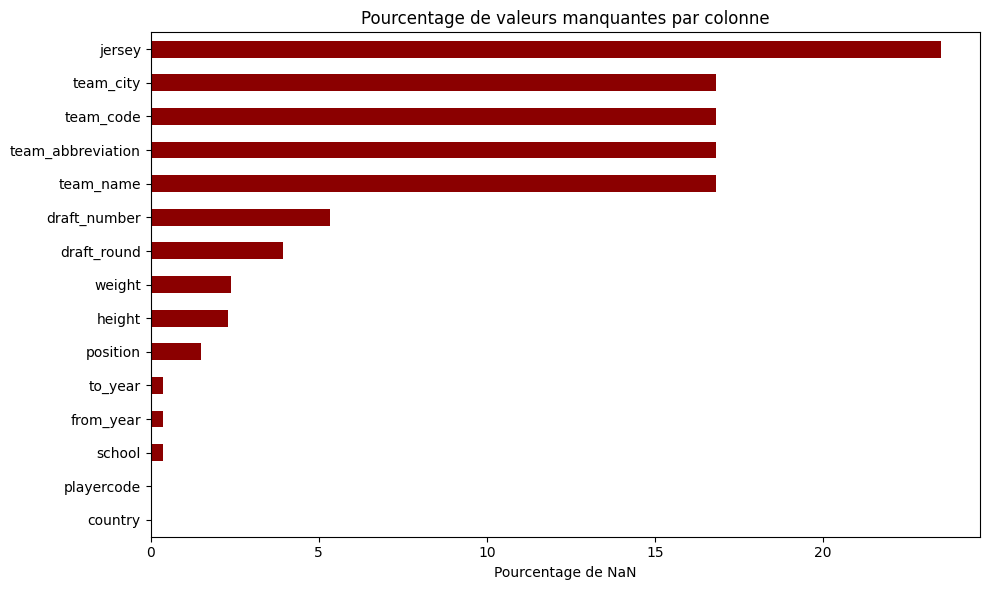

In [40]:
# Pourcentage de valeurs manquantes
missing_percent = df_common_players.isnull().mean() * 100
missing_cols = missing_percent[missing_percent > 0].sort_values()

# Barplot
plt.figure(figsize=(10, 6))
missing_cols.plot(kind='barh', color='darkred')
plt.title("Pourcentage de valeurs manquantes par colonne")
plt.xlabel("Pourcentage de NaN")
plt.tight_layout()
plt.show()


### Traitement des valeurs manquantes

In [41]:
# Valeurs textuelles : remplacement par "Unknown"
df_common_players['school'] = df_common_players['school'].fillna("Unknown")
df_common_players['position'] = df_common_players['position'].fillna("Unknown")
df_common_players['team_name'] = df_common_players['team_name'].fillna("Unknown")
df_common_players['team_abbreviation'] = df_common_players['team_abbreviation'].fillna("UNK")
df_common_players['team_code'] = df_common_players['team_code'].fillna("unknown")
df_common_players['team_city'] = df_common_players['team_city'].fillna("Unknown")
df_common_players['jersey'] = df_common_players['jersey'].fillna("00")  # Optionnel : autre stratégie possible

# Valeurs numériques : remplissage avec la médiane
df_common_players['weight'] = df_common_players['weight'].fillna(df_common_players['weight'].median())
df_common_players['season_exp'] = df_common_players['season_exp'].fillna(df_common_players['season_exp'].median())
df_common_players['from_year'] = df_common_players['from_year'].fillna(df_common_players['from_year'].median())
df_common_players['to_year'] = df_common_players['to_year'].fillna(df_common_players['to_year'].median())

# Draft
df_common_players['draft_round'] = df_common_players['draft_round'].fillna("Undrafted")
df_common_players['draft_number'] = df_common_players['draft_number'].fillna("Undrafted")


### Suppression doublons

In [42]:
print("Doublons :", df_common_players.duplicated().sum())
df_common_players.drop_duplicates(inplace=True)


Doublons : 0


### Correction des types

In [44]:
# Dates
df_common_players['birthdate'] = pd.to_datetime(df_common_players['birthdate'], errors='coerce')

# Catégories
cat_cols = ['country', 'school', 'position', 'team_abbreviation', 'team_name', 
            'team_city', 'draft_year', 'draft_round', 'draft_number', 'nba_flag', 
            'dleague_flag', 'games_played_flag', 'greatest_75_flag']
for col in cat_cols:
    df_common_players[col] = df_common_players[col].astype('category')


In [129]:
df_common_players.to_csv('df_common_players_cleaned.csv', index=False)

## 3. Draft_combine

In [48]:
# 📥 2. Chargement du dataset
df_draft_combine = pd.read_csv("csv/draft_combine_stats.csv")
df_draft_combine.head()

,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,weight,wingspan,wingspan_ft_in,standing_reach,standing_reach_ft_in,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,lane_agility_time,modified_lane_agility_time,three_quarter_sprint,bench_press,spot_fifteen_corner_left,spot_fifteen_break_left,spot_fifteen_top_key,spot_fifteen_break_right,spot_fifteen_corner_right,spot_college_corner_left,spot_college_break_left,spot_college_top_key,spot_college_break_right,spot_college_corner_right,spot_nba_corner_left,spot_nba_break_left,spot_nba_top_key,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
0,2001,12033,Adam,Allenspach,Adam Allenspach,C,83.50,6' 11.5'',NaN,NaN,259.0,84.5,7' 0.5'',107.0,8' 11'',12.4,NaN,NaN,28.5,31.0,11.90,NaN,3.40,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,2240,Gilbert,Arenas,Gilbert Arenas,SG,74.25,6' 2.25'',NaN,NaN,199.0,81.5,6' 9.5'',99.5,8' 3.5'',5.3,NaN,NaN,31.5,36.0,NaN,NaN,3.25,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,2220,Brandon,Armstrong,Brandon Armstrong,SG,75.50,6' 3.5'',NaN,NaN,188.0,81.5,6' 9.5'',99.5,8' 3.5'',9.3,NaN,NaN,30.0,37.0,10.91,NaN,3.20,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,2203,Shane,Battier,Shane Battier,SF-PF,80.25,6' 8.25'',NaN,NaN,229.0,82.5,6' 10.5'',105.0,8' 9'',9.3,NaN,NaN,29.5,33.0,10.95,NaN,3.30,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,12034,Cookie,Belcher,Cookie Belcher,SG-PG,75.00,6' 3'',NaN,NaN,206.0,80.5,6' 8.5'',99.0,8' 3'',5.3,NaN,NaN,35.0,41.5,11.26,NaN,2.91,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_draft_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season                        1202 non-null   int64  
 1   player_id                     1202 non-null   int64  
 2   first_name                    1202 non-null   object 
 3   last_name                     1202 non-null   object 
 4   player_name                   1202 non-null   object 
 5   position                      1197 non-null   object 
 6   height_wo_shoes               1153 non-null   float64
 7   height_wo_shoes_ft_in         1153 non-null   object 
 8   height_w_shoes                1008 non-null   float64
 9   height_w_shoes_ft_in          1008 non-null   object 
 10  weight                        1152 non-null   float64
 11  wingspan                      1153 non-null   float64
 12  wingspan_ft_in                1153 non-null   object 
 13  sta

In [50]:
df_draft_combine.describe(include='all')

,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,weight,wingspan,wingspan_ft_in,standing_reach,standing_reach_ft_in,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,lane_agility_time,modified_lane_agility_time,three_quarter_sprint,bench_press,spot_fifteen_corner_left,spot_fifteen_break_left,spot_fifteen_top_key,spot_fifteen_break_right,spot_fifteen_corner_right,spot_college_corner_left,spot_college_break_left,spot_college_top_key,spot_college_break_right,spot_college_corner_right,spot_nba_corner_left,spot_nba_break_left,spot_nba_top_key,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
count,1202.000000,1.202000e+03,1202,1202,1202,1197,1153.000000,1153,1008.000000,1008,1152.000000,1153.000000,1153,1152.000000,1152,1003.000000,719.000000,719.000000,1017.000000,1017.000000,1008.000000,411.000000,1012.000000,808.000000,74,76,76,76,76,245,166,166,166,166,217,217,217,217,217,166,166,166,110,31,31,148,116
unique,NaN,NaN,696,853,1178,13,NaN,120,NaN,115,NaN,NaN,138,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,5,5,6,6,23,8,8,6,6,9,8,7,7,6,22,17,20,27,13,12,109,50
top,NaN,NaN,Jordan,Brown,Hamidou Diallo,PF,NaN,6' 8.75'',NaN,6' 8.5'',NaN,NaN,6' 9'',NaN,8' 10.5'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-5,3-5,4-5,4-5,3-5,3-5,3-5,3-5,3-5,3-5,3-5,3-5,3-5,3-5,3-5,2-4,3-4,3-4,18-30,3-4,2-4,23-34,11-25
freq,NaN,NaN,18,19,2,216,NaN,40,NaN,41,NaN,NaN,37,NaN,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,33,25,24,28,52,47,54,54,54,64,59,61,73,75,28,31,26,11,8,8,4,11
mean,2012.536606,2.350133e+06,NaN,NaN,NaN,NaN,77.570902,NaN,78.796577,NaN,214.902604,82.478187,NaN,103.593663,NaN,7.352313,8.720793,9.448887,29.240167,34.637168,11.384444,3.079221,3.282213,10.155941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6.561620,5.660210e+07,NaN,NaN,NaN,NaN,3.334605,NaN,3.322625,NaN,25.718878,3.986623,NaN,4.880218,NaN,2.748712,0.481028,0.717066,3.054645,3.648106,0.584896,0.229143,0.131850,5.389231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2001.000000,-1.000000e+00,NaN,NaN,NaN,NaN,67.750000,NaN,69.000000,NaN,154.400000,70.000000,NaN,89.500000,NaN,2.600000,7.500000,7.000000,20.500000,25.000000,9.650000,2.220000,2.910000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2007.000000,1.011455e+05,NaN,NaN,NaN,NaN,75.250000,NaN,76.500000,NaN,195.950000,80.000000,NaN,100.000000,NaN,5.400000,8.500000,9.000000,27.000000,32.000000,10.970000,2.970000,3.190000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,2.031470e+05,NaN,NaN,NaN,NaN,77.750000,NaN,79.000000,NaN,212.900000,82.750000,NaN,104.000000,NaN,6.700000,8.750000,9.500000,29.000000,34.500000,11.320000,3.100000,3.270000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2018.000000,1.629014e+06,NaN,NaN,NaN,NaN,80.000000,NaN,81.250000,NaN,233.000000,85.250000,NaN,107.000000,NaN,8.600000,9.000000,10.000000,31.500000,37.000000,11.720000,3.230000,3.360000,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# 🔍 3. Nettoyage des colonnes à très forte proportion de NaN (>80 %)
drop_cols = df_draft_combine.columns[df_draft_combine.isnull().mean() > 0.8]
df_draft_combine.drop(columns=drop_cols, inplace=True)

# 🧽 4. Imputation des valeurs manquantes restantes
# Numériques → médiane
num_cols = df_draft_combine.select_dtypes(include=["float64", "int64"]).columns
df_draft_combine[num_cols] = df_draft_combine[num_cols].apply(lambda x: x.fillna(x.median()))

# Catégoriques → "Unknown"
cat_cols = df_draft_combine.select_dtypes(include=["object"]).columns
df_draft_combine[cat_cols] = df_draft_combine[cat_cols].fillna("Unknown")

# 📏 5. Conversion taille en cm
df_draft_combine['height_wo_shoes_cm'] = df_draft_combine['height_wo_shoes'] * 2.54
df_draft_combine['height_w_shoes_cm'] = df_draft_combine['height_w_shoes'] * 2.54
df_draft_combine['wingspan_cm'] = df_draft_combine['wingspan'] * 2.54
df_draft_combine['standing_reach_cm'] = df_draft_combine['standing_reach'] * 2.54

# 🧼 6. Nettoyage des noms de colonnes
df_draft_combine.columns = df_draft_combine.columns.str.strip().str.lower().str.replace(" ", "_")

In [53]:
df_draft_combine.head()

,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,weight,wingspan,wingspan_ft_in,standing_reach,standing_reach_ft_in,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,lane_agility_time,modified_lane_agility_time,three_quarter_sprint,bench_press,spot_college_corner_left,height_wo_shoes_cm,height_w_shoes_cm,wingspan_cm,standing_reach_cm
0,2001,12033,Adam,Allenspach,Adam Allenspach,C,83.50,6' 11.5'',79.0,Unknown,259.0,84.5,7' 0.5'',107.0,8' 11'',12.4,8.75,9.5,28.5,31.0,11.90,3.1,3.40,16.0,Unknown,212.090,200.66,214.63,271.78
1,2001,2240,Gilbert,Arenas,Gilbert Arenas,SG,74.25,6' 2.25'',79.0,Unknown,199.0,81.5,6' 9.5'',99.5,8' 3.5'',5.3,8.75,9.5,31.5,36.0,11.32,3.1,3.25,12.0,Unknown,188.595,200.66,207.01,252.73
2,2001,2220,Brandon,Armstrong,Brandon Armstrong,SG,75.50,6' 3.5'',79.0,Unknown,188.0,81.5,6' 9.5'',99.5,8' 3.5'',9.3,8.75,9.5,30.0,37.0,10.91,3.1,3.20,6.0,Unknown,191.770,200.66,207.01,252.73
3,2001,2203,Shane,Battier,Shane Battier,SF-PF,80.25,6' 8.25'',79.0,Unknown,229.0,82.5,6' 10.5'',105.0,8' 9'',9.3,8.75,9.5,29.5,33.0,10.95,3.1,3.30,12.0,Unknown,203.835,200.66,209.55,266.70
4,2001,12034,Cookie,Belcher,Cookie Belcher,SG-PG,75.00,6' 3'',79.0,Unknown,206.0,80.5,6' 8.5'',99.0,8' 3'',5.3,8.75,9.5,35.0,41.5,11.26,3.1,2.91,7.0,Unknown,190.500,200.66,204.47,251.46


In [130]:
df_draft_combine.to_csv('df_draft_combine_cleaned.csv', index=False)

## 4. Draft_history

In [54]:
df_draft_history = pd.read_csv("csv/draft_history.csv")
df_draft_history.head()

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,79299,Clifton McNeeley,1947,1,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1


In [55]:
df_draft_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7990 entries, 0 to 7989
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   person_id            7990 non-null   int64 
 1   player_name          7990 non-null   object
 2   season               7990 non-null   int64 
 3   round_number         7990 non-null   int64 
 4   round_pick           7990 non-null   int64 
 5   overall_pick         7990 non-null   int64 
 6   draft_type           7990 non-null   object
 7   team_id              7990 non-null   int64 
 8   team_city            7990 non-null   object
 9   team_name            7990 non-null   object
 10  team_abbreviation    7990 non-null   object
 11  organization         7971 non-null   object
 12  organization_type    7971 non-null   object
 13  player_profile_flag  7990 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 874.0+ KB


In [56]:
df_draft_history.describe(include='all')

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
count,7.990000e+03,7990,7990.000000,7990.000000,7990.000000,7990.000000,7990,7.990000e+03,7990,7990,7990,7971,7971,7990.000000
unique,NaN,7700,NaN,NaN,NaN,NaN,2,NaN,51,47,67,903,3,NaN
top,NaN,Mike Williams,NaN,NaN,NaN,NaN,Draft,NaN,Philadelphia,Hawks,NYK,Kentucky,College/University,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,7971,NaN,488,479,475,137,7597,NaN
mean,1.828371e+05,NaN,1979.613642,4.532290,9.538924,67.221402,NaN,1.610613e+09,NaN,NaN,NaN,NaN,NaN,0.444180
std,3.902971e+05,NaN,18.715640,3.883766,7.539087,59.310550,NaN,4.875676e+02,NaN,NaN,NaN,NaN,NaN,0.496905
min,2.000000e+00,NaN,1947.000000,0.000000,0.000000,0.000000,NaN,1.610610e+09,NaN,NaN,NaN,NaN,NaN,0.000000
25%,7.766825e+04,NaN,1968.000000,1.000000,3.000000,20.000000,NaN,1.610613e+09,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8.076550e+04,NaN,1978.000000,3.000000,8.000000,49.000000,NaN,1.610613e+09,NaN,NaN,NaN,NaN,NaN,0.000000
75%,8.272075e+04,NaN,1988.000000,7.000000,15.000000,105.000000,NaN,1.610613e+09,NaN,NaN,NaN,NaN,NaN,1.000000


In [57]:
df_draft_history['organization'] = df_draft_history['organization'].fillna("Unknown")
df_draft_history['organization_type'] = df_draft_history['organization_type'].fillna("Unknown")

# 🧹 4. Vérification et suppression des doublons si nécessaire
print("Doublons détectés :", df_draft_history.duplicated().sum())
df_draft_history.drop_duplicates(inplace=True)

# 🧠 5. Typage
df_draft_history['season'] = df_draft_history['season'].astype('int')
df_draft_history['draft_type'] = df_draft_history['draft_type'].astype('category')
df_draft_history['organization_type'] = df_draft_history['organization_type'].astype('category')
df_draft_history['team_abbreviation'] = df_draft_history['team_abbreviation'].astype('category')
df_draft_history['team_name'] = df_draft_history['team_name'].astype('category')
df_draft_history['team_city'] = df_draft_history['team_city'].astype('category')

# 🧼 6. Nettoyage des noms de colonnes
df_draft_history.columns = df_draft_history.columns.str.strip().str.lower().str.replace(' ', '_')

Doublons détectés : 0


In [58]:
df_draft_history.head()

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,79299,Clifton McNeeley,1947,1,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1


In [131]:
df_draft_history.to_csv('df_draft_history_cleaned.csv', index=False)

## 5.Games infos

In [64]:
df_game_info = pd.read_csv("csv/game_info.csv")
df_game_info.head()

,game_id,game_date,attendance,game_time
0,24600001,1946-11-01 00:00:00,NaN,NaN
1,24600003,1946-11-02 00:00:00,NaN,NaN
2,24600002,1946-11-02 00:00:00,NaN,NaN
3,24600004,1946-11-02 00:00:00,NaN,NaN
4,24600005,1946-11-02 00:00:00,NaN,NaN


In [65]:
df_game_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58053 entries, 0 to 58052
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   game_id     58053 non-null  int64  
 1   game_date   58053 non-null  object 
 2   attendance  52673 non-null  float64
 3   game_time   29942 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


In [66]:
df_game_info.describe(include='all')

,game_id,game_date,attendance,game_time
count,5.805300e+04,58053,52673.000000,29942
unique,NaN,12598,NaN,144
top,NaN,2023-04-09 00:00:00,NaN,2:13
freq,NaN,15,NaN,1302
mean,2.579790e+07,NaN,15097.689158,NaN
std,6.331314e+06,NaN,5142.654175,NaN
min,1.050000e+07,NaN,0.000000,NaN
25%,2.130028e+07,NaN,12260.000000,NaN
50%,2.590030e+07,NaN,16205.000000,NaN
75%,2.880075e+07,NaN,18700.000000,NaN


In [67]:
df_game_info_cleaned = df_game_info.dropna(subset=["attendance", "game_time"], how="all")

# 📅 4. Conversion de la date
df_game_info['game_date'] = pd.to_datetime(df_game_info['game_date'], errors='coerce')

# 🧹 5. Suppression des doublons
print("Doublons détectés :", df_game_info.duplicated().sum())
df_game_info.drop_duplicates(inplace=True)

Doublons détectés : 40


In [68]:
df_game_info.head()

,game_id,game_date,attendance,game_time
0,24600001,1946-11-01,NaN,NaN
1,24600003,1946-11-02,NaN,NaN
2,24600002,1946-11-02,NaN,NaN
3,24600004,1946-11-02,NaN,NaN
4,24600005,1946-11-02,NaN,NaN


In [132]:
df_game_info.to_csv('df_game_info_cleaned.csv', index=False)

## 6. game summary

In [69]:
df_game_summary = pd.read_csv("csv/game_summary.csv")
df_game_summary.head()

,game_date_est,game_sequence,game_id,game_status_id,game_status_text,gamecode,home_team_id,visitor_team_id,season,live_period,live_pc_time,natl_tv_broadcaster_abbreviation,live_period_time_bcast,wh_status
0,1946-11-01 00:00:00,NaN,24600001,3,NaN,19461101/NYKHUS,1610610035,1610612752,1946,5,NaN,NaN,Q5 -,1
1,1946-11-02 00:00:00,NaN,24600003,3,NaN,19461102/PITBOM,1610610034,1610610031,1946,4,NaN,NaN,Q4 -,1
2,1946-11-02 00:00:00,NaN,24600002,3,NaN,19461102/BOSPRO,1610610032,1610612738,1946,4,NaN,NaN,Q4 -,1
3,1946-11-02 00:00:00,NaN,24600004,3,NaN,19461102/NYKCHS,1610610025,1610612752,1946,4,NaN,NaN,Q4 -,1
4,1946-11-02 00:00:00,NaN,24600005,3,NaN,19461102/WASDEF,1610610028,1610610036,1946,4,NaN,NaN,Q4 -,1


In [70]:
df_game_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58110 entries, 0 to 58109
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   game_date_est                     58110 non-null  object 
 1   game_sequence                     32578 non-null  float64
 2   game_id                           58110 non-null  int64  
 3   game_status_id                    58110 non-null  int64  
 4   game_status_text                  32124 non-null  object 
 5   gamecode                          58110 non-null  object 
 6   home_team_id                      58110 non-null  int64  
 7   visitor_team_id                   58110 non-null  int64  
 8   season                            58110 non-null  int64  
 9   live_period                       58110 non-null  int64  
 10  live_pc_time                      2024 non-null   object 
 11  natl_tv_broadcaster_abbreviation  6203 non-null   object 
 12  live

In [71]:
df_game_summary.describe(include='all')

,game_date_est,game_sequence,game_id,game_status_id,game_status_text,gamecode,home_team_id,visitor_team_id,season,live_period,live_pc_time,natl_tv_broadcaster_abbreviation,live_period_time_bcast,wh_status
count,58110,32578.000000,5.811000e+04,58110.000000,32124,58110,5.811000e+04,5.811000e+04,58110.000000,58110.000000,2024,6203,58110,58110.0
unique,12610,NaN,NaN,NaN,5,58021,NaN,NaN,NaN,NaN,3,20,67,NaN
top,2023-04-09 00:00:00,NaN,NaN,NaN,Final,20161001/GSWTOR,NaN,NaN,NaN,NaN,,NBA TV,Q4 -,NaN
freq,15,NaN,NaN,NaN,32027,4,NaN,NaN,NaN,NaN,2022,2063,47472,NaN
mean,NaN,4.249616,2.580493e+07,2.996730,NaN,NaN,1.609864e+09,1.608839e+09,1994.547703,4.055619,NaN,NaN,NaN,1.0
std,NaN,3.061465,6.346656e+06,0.080801,NaN,NaN,3.470944e+07,5.342164e+07,19.140472,0.360031,NaN,NaN,NaN,0.0
min,NaN,0.000000,1.050000e+07,1.000000,NaN,NaN,4.500000e+01,4.100000e+01,1946.000000,0.000000,NaN,NaN,NaN,1.0
25%,NaN,2.000000,2.130028e+07,3.000000,NaN,NaN,1.610613e+09,1.610613e+09,1982.000000,4.000000,NaN,NaN,NaN,1.0
50%,NaN,4.000000,2.620002e+07,3.000000,NaN,NaN,1.610613e+09,1.610613e+09,1997.000000,4.000000,NaN,NaN,NaN,1.0
75%,NaN,6.000000,2.880078e+07,3.000000,NaN,NaN,1.610613e+09,1.610613e+09,2010.000000,4.000000,NaN,NaN,NaN,1.0


In [72]:
df_game_summary.drop(columns=["game_sequence", "game_status_text", "live_pc_time", "natl_tv_broadcaster_abbreviation"], inplace=True)

# 📅 Conversion de la date
df_game_summary['game_date_est'] = pd.to_datetime(df_game_summary['game_date_est'], errors='coerce')

# 🧹 Nettoyage des colonnes texte (remplissage optionnel)
df_game_summary['live_period_time_bcast'] = df_game_summary['live_period_time_bcast'].fillna("Unknown")


In [73]:
df_game_summary.head()

,game_date_est,game_id,game_status_id,gamecode,home_team_id,visitor_team_id,season,live_period,live_period_time_bcast,wh_status
0,1946-11-01,24600001,3,19461101/NYKHUS,1610610035,1610612752,1946,5,Q5 -,1
1,1946-11-02,24600003,3,19461102/PITBOM,1610610034,1610610031,1946,4,Q4 -,1
2,1946-11-02,24600002,3,19461102/BOSPRO,1610610032,1610612738,1946,4,Q4 -,1
3,1946-11-02,24600004,3,19461102/NYKCHS,1610610025,1610612752,1946,4,Q4 -,1
4,1946-11-02,24600005,3,19461102/WASDEF,1610610028,1610610036,1946,4,Q4 -,1


In [133]:
df_game_summary.to_csv('df_game_summary_cleaned.csv', index=False)

## 7. Game

In [74]:
df_game = pd.read_csv("csv/game.csv")
df_game.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,NaN,NaN,NaN,NaN,NaN,16.0,29.0,0.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,-2,0,1610612752,NYK,New York Knicks,NYK @ HUS,W,24.0,NaN,NaN,NaN,NaN,NaN,20.0,26.0,0.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,59.0,0.339,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,56.0,5,0,1610610031,PIT,Pittsburgh Ironmen,PIT @ BOM,L,16.0,72.0,0.222,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,6,0,1610612738,BOS,Boston Celtics,BOS @ PRO,L,21.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,63.0,16,0,1610612752,NYK,New York Knicks,NYK @ CHS,L,16.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,-17,0,1610610036,WAS,Washington Capitols,WAS @ DEF,W,18.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


In [75]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65698 entries, 0 to 65697
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_id               65698 non-null  int64  
 1   team_id_home            65698 non-null  int64  
 2   team_abbreviation_home  65698 non-null  object 
 3   team_name_home          65698 non-null  object 
 4   game_id                 65698 non-null  int64  
 5   game_date               65698 non-null  object 
 6   matchup_home            65698 non-null  object 
 7   wl_home                 65696 non-null  object 
 8   min                     65698 non-null  int64  
 9   fgm_home                65685 non-null  float64
 10  fga_home                50251 non-null  float64
 11  fg_pct_home             50208 non-null  float64
 12  fg3m_home               52480 non-null  float64
 13  fg3a_home               47015 non-null  float64
 14  fg3_pct_home            46624 non-null

In [76]:
df_game.describe(include='all')

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
count,65698.000000,6.569800e+04,65698,65698,6.569800e+04,65698,65698,65696,65698.000000,65685.000000,50251.000000,50208.000000,52480.000000,47015.000000,46624.000000,65682.000000,62694.000000,62689.000000,46762.000000,46699.000000,49969.000000,49893.000000,46849.000000,47072.000000,47014.000000,62842.000000,65698.000000,65698.000000,65698.000000,6.569800e+04,65698,65698,65698,65696,65685.000000,50251.000000,50209.000000,52480.000000,47015.000000,46736.000000,65685.000000,62694.000000,62692.000000,46762.000000,46700.000000,49973.000000,49897.000000,46849.000000,47073.000000,47013.000000,62847.000000,65698.000000,65698.000000,65698.000000,65698
unique,NaN,NaN,97,98,NaN,12882,2292,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,101,2292,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,BOS,Boston Celtics,NaN,2022-04-10 00:00:00,BOS vs. NYK,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOS,Boston Celtics,NYK @ BOS,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular Season
freq,NaN,NaN,3124,3124,NaN,15,258,40649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3083,3083,258,40649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60192
mean,22949.338747,1.609926e+09,NaN,NaN,2.584747e+07,NaN,NaN,NaN,221.003486,39.672269,83.992796,0.467321,5.735099,17.741146,0.346136,20.693021,27.141592,0.755418,12.110688,31.411529,43.761432,23.940994,7.991782,5.313690,14.782724,22.382754,104.619136,3.627569,0.201330,1.608946e+09,NaN,NaN,NaN,NaN,38.351846,83.768781,0.454909,5.638586,17.777156,0.336639,19.785842,26.036064,0.752666,11.686861,30.238073,42.119645,22.135419,7.854148,4.681537,15.199860,23.097284,100.991567,-3.627569,0.201330,NaN
std,5000.305500,3.324313e+07,NaN,NaN,6.303760e+06,NaN,NaN,NaN,67.903521,6.770802,9.164445,0.059423,4.537337,10.545810,0.151234,7.138851,8.848790,0.098612,4.437156,5.612731,7.087954,5.694053,3.110087,2.768968,4.140004,5.042668,14.757924,13.091395,0.400997,5.178990e+07,NaN,NaN,NaN,NaN,6.480155,9.124196,0.059219,4.447714,10.458153,0.147297,6.842216,8.496635,0.103493,4.281311,5.588675,6.867396,5.380805,3.031766,2.500820,4.299798,5.227208,14.418755,13.091395,0.400997,NaN
min,12005.000000,4.500000e+01,NaN,NaN,1.050000e+07,NaN,NaN,NaN,0.000000,4.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,-68.000000,0.000000,4.100000e+01,NaN,NaN,NaN,NaN,4.000000,0.000000,0.156000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,-73.000000,0.000000,NaN
25%,21981.000000,1.610613e+09,NaN,NaN,2.130053e+07,NaN,NaN,NaN,240.000000,35.000000,78.000000,0.427000,2.000000,10.000000,0.261000,16.000000,21.000000,0.694000,9.000000,28.000000,39.000000,20.000000,6.000000,3.000000,12.000000,19.000000,95.000000,-5.000000,0.000000,1.610613e+09,NaN,NaN,NaN,NaN,34.000000,78.000000,0.416000,2.000000,10.000000,0.250000,15.000000,20.000000,0.690000,9.000000,26.000000,37.000000,18.000000,6.000000,3.000000,12.000000,20.000000,92.000000,-12.000000,0.000000,NaN
50%,21997.000000,1.610613e+09,NaN,NaN,2.630007e+07,NaN,NaN,NaN,240.

In [77]:
# ✅ 1. Conversion de la date
df_game['game_date'] = pd.to_datetime(df_game['game_date'], errors='coerce')

# ✅ 2. Suppression des colonnes où TOUTES les valeurs sont manquantes
df_game.dropna(axis=1, how='all', inplace=True)

# ✅ 3. Suppression des lignes avec >50% de NaN (optionnel, si tu veux nettoyer fort)
# df_game = df_game[df_game.isnull().mean(axis=1) < 0.5]

# ✅ 4. Imputation :
# Numériques → médiane
num_cols = df_game.select_dtypes(include=["float64", "int64"]).columns
df_game[num_cols] = df_game[num_cols].apply(lambda x: x.fillna(x.median()))

# Catégoriques → "Unknown"
cat_cols = df_game.select_dtypes(include=["object"]).columns
df_game[cat_cols] = df_game[cat_cols].fillna("Unknown")

# ✅ 5. Nettoyage des noms de colonnes
df_game.columns = df_game.columns.str.strip().str.lower().str.replace(" ", "_")


In [78]:
df_game.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01,HUS vs. NYK,L,0,25.0,84.0,0.467,5.0,16.0,0.348,16.0,29.0,0.552,12.0,31.0,43.0,24.0,8.0,5.0,15.0,22.0,66.0,-2,0,1610612752,NYK,New York Knicks,NYK @ HUS,W,24.0,83.0,0.455,5.0,16.0,0.333,20.0,26.0,0.769,11.0,30.0,42.0,22.0,8.0,4.0,15.0,23.0,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02,BOM vs. PIT,W,0,20.0,59.0,0.339,5.0,16.0,0.348,16.0,27.0,0.760,12.0,31.0,43.0,24.0,8.0,5.0,15.0,21.0,56.0,5,0,1610610031,PIT,Pittsburgh Ironmen,PIT @ BOM,L,16.0,72.0,0.222,5.0,16.0,0.333,19.0,25.0,0.758,11.0,30.0,42.0,22.0,8.0,4.0,15.0,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02,PRO vs. BOS,W,0,21.0,84.0,0.467,5.0,16.0,0.348,17.0,27.0,0.760,12.0,31.0,43.0,24.0,8.0,5.0,15.0,22.0,59.0,6,0,1610612738,BOS,Boston Celtics,BOS @ PRO,L,21.0,83.0,0.455,5.0,16.0,0.333,11.0,25.0,0.758,11.0,30.0,42.0,22.0,8.0,4.0,15.0,23.0,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02,CHS vs. NYK,W,0,21.0,84.0,0.467,5.0,16.0,0.348,21.0,27.0,0.760,12.0,31.0,43.0,24.0,8.0,5.0,15.0,20.0,63.0,16,0,1610612752,NYK,New York Knicks,NYK @ CHS,L,16.0,83.0,0.455,5.0,16.0,0.333,15.0,25.0,0.758,11.0,30.0,42.0,22.0,8.0,4.0,15.0,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02,DEF vs. WAS,L,0,10.0,84.0,0.467,5.0,16.0,0.348,13.0,27.0,0.760,12.0,31.0,43.0,24.0,8.0,5.0,15.0,22.0,33.0,-17,0,1610610036,WAS,Washington Capitols,WAS @ DEF,W,18.0,83.0,0.455,5.0,16.0,0.333,14.0,25.0,0.758,11.0,30.0,42.0,22.0,8.0,4.0,15.0,23.0,50.0,17,0,Regular Season


In [134]:
df_game.to_csv('df_game_cleaned.csv', index=False)

## 8. Inactive players

In [79]:
df_inactive = pd.read_csv("csv/inactive_players.csv")
df_inactive.head()

,game_id,player_id,first_name,last_name,jersey_num,team_id,team_city,team_name,team_abbreviation
0,29600034,184,Bobby,Phills,14.0,1610612739,Cleveland,Cavaliers,CLE
1,29600034,781,Will,Perdue,41.0,1610612759,San Antonio,Spurs,SAS
2,29600132,120,Steven,Smith,8.0,1610612737,Atlanta,Hawks,ATL
3,29600203,698,Eddie,Johnson,8.0,1610612754,Indiana,Pacers,IND
4,29600213,32,Clifford,Rozier,44.0,1610612753,Orlando,Magic,ORL


In [80]:
df_inactive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110191 entries, 0 to 110190
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   game_id            110191 non-null  int64  
 1   player_id          110191 non-null  int64  
 2   first_name         110190 non-null  object 
 3   last_name          110190 non-null  object 
 4   jersey_num         110148 non-null  float64
 5   team_id            110191 non-null  int64  
 6   team_city          110191 non-null  object 
 7   team_name          110191 non-null  object 
 8   team_abbreviation  110191 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.6+ MB


In [81]:
df_inactive.describe(include='all')

,game_id,player_id,first_name,last_name,jersey_num,team_id,team_city,team_name,team_abbreviation
count,1.101910e+05,1.101910e+05,110190,110190,110148.000000,1.101910e+05,110191,110191,110191
unique,NaN,NaN,1099,1426,NaN,NaN,41,41,45
top,NaN,NaN,Chris,Williams,NaN,NaN,Los Angeles,Cavaliers,CLE
freq,NaN,NaN,1661,1808,NaN,NaN,5157,4258,4258
mean,2.236352e+07,6.644920e+05,NaN,NaN,18.663389,1.610496e+09,NaN,NaN,NaN
std,4.511626e+06,5.984247e+06,NaN,NaN,15.954240,1.372290e+07,NaN,NaN,NaN
min,1.050001e+07,0.000000e+00,NaN,NaN,0.000000,1.230800e+04,NaN,NaN,NaN
25%,2.090105e+07,1.011280e+05,NaN,NaN,7.000000,1.610613e+09,NaN,NaN,NaN
50%,2.170006e+07,2.026950e+05,NaN,NaN,14.000000,1.610613e+09,NaN,NaN,NaN
75%,2.200041e+07,1.628366e+06,NaN,NaN,27.000000,1.610613e+09,NaN,NaN,NaN


In [82]:
# 🧽 Traitement de la colonne jersey_num (très peu de NaN, on remplit par 0)
df_inactive['jersey_num'] = df_inactive['jersey_num'].fillna(0).astype(int)

# 🧠 Typage catégoriel pour allègement mémoire
cat_cols = ['team_city', 'team_name', 'team_abbreviation']
for col in cat_cols:
    df_inactive[col] = df_inactive[col].astype('category')

# 🧼 Nettoyage des noms de colonnes
df_inactive.columns = df_inactive.columns.str.strip().str.lower().str.replace(" ", "_")

In [83]:
df_inactive.head()

,game_id,player_id,first_name,last_name,jersey_num,team_id,team_city,team_name,team_abbreviation
0,29600034,184,Bobby,Phills,14,1610612739,Cleveland,Cavaliers,CLE
1,29600034,781,Will,Perdue,41,1610612759,San Antonio,Spurs,SAS
2,29600132,120,Steven,Smith,8,1610612737,Atlanta,Hawks,ATL
3,29600203,698,Eddie,Johnson,8,1610612754,Indiana,Pacers,IND
4,29600213,32,Clifford,Rozier,44,1610612753,Orlando,Magic,ORL


In [135]:
df_inactive.to_csv('df_inactive_cleaned.csv', index=False)

## 9. line score

In [84]:
df_line_score = pd.read_csv("csv/line_score.csv")
df_line_score.head()

,game_date_est,game_sequence,game_id,team_id_home,team_abbreviation_home,team_city_name_home,team_nickname_home,team_wins_losses_home,pts_qtr1_home,pts_qtr2_home,pts_qtr3_home,pts_qtr4_home,pts_ot1_home,pts_ot2_home,pts_ot3_home,pts_ot4_home,pts_ot5_home,pts_ot6_home,pts_ot7_home,pts_ot8_home,pts_ot9_home,pts_ot10_home,pts_home,team_id_away,team_abbreviation_away,team_city_name_away,team_nickname_away,team_wins_losses_away,pts_qtr1_away,pts_qtr2_away,pts_qtr3_away,pts_qtr4_away,pts_ot1_away,pts_ot2_away,pts_ot3_away,pts_ot4_away,pts_ot5_away,pts_ot6_away,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away,pts_away
0,1946-11-01 00:00:00,NaN,24600001,1610610035,HUS,Toronto,Huskies,-,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,1610612752,NYK,New York,Knicks,-,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0
1,1946-11-02 00:00:00,NaN,24600003,1610610034,BOM,St. Louis,Bombers,-,16.0,16.0,18.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,1610610031,PIT,Pittsburgh,Ironmen,-,5.0,15.0,17.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0
2,1946-11-02 00:00:00,NaN,24600002,1610612738,BOS,Boston,Celtics,-,10.0,16.0,14.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,1610610032,PRO,Providence,Steamrollers,-,NaN,12.0,18.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
3,1946-11-02 00:00:00,NaN,24600004,1610610025,CHS,Chicago,Stags,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,1610612752,NYK,New York,Knicks,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0
4,1946-11-02 00:00:00,NaN,24600005,1610610036,WAS,Washington,Capitols,-,21.0,4.0,12.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,1610610028,DEF,Detroit,Falcons,-,9.0,10.0,10.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0


In [85]:
df_line_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58053 entries, 0 to 58052
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_date_est           58053 non-null  object 
 1   game_sequence           32521 non-null  float64
 2   game_id                 58053 non-null  int64  
 3   team_id_home            58053 non-null  int64  
 4   team_abbreviation_home  58053 non-null  object 
 5   team_city_name_home     58053 non-null  object 
 6   team_nickname_home      58053 non-null  object 
 7   team_wins_losses_home   58053 non-null  object 
 8   pts_qtr1_home           57049 non-null  float64
 9   pts_qtr2_home           57040 non-null  float64
 10  pts_qtr3_home           57008 non-null  float64
 11  pts_qtr4_home           57009 non-null  float64
 12  pts_ot1_home            32294 non-null  float64
 13  pts_ot2_home            31002 non-null  float64
 14  pts_ot3_home            30810 non-null

In [86]:
df_line_score.describe(include='all')

,game_date_est,game_sequence,game_id,team_id_home,team_abbreviation_home,team_city_name_home,team_nickname_home,team_wins_losses_home,pts_qtr1_home,pts_qtr2_home,pts_qtr3_home,pts_qtr4_home,pts_ot1_home,pts_ot2_home,pts_ot3_home,pts_ot4_home,pts_ot5_home,pts_ot6_home,pts_ot7_home,pts_ot8_home,pts_ot9_home,pts_ot10_home,pts_home,team_id_away,team_abbreviation_away,team_city_name_away,team_nickname_away,team_wins_losses_away,pts_qtr1_away,pts_qtr2_away,pts_qtr3_away,pts_qtr4_away,pts_ot1_away,pts_ot2_away,pts_ot3_away,pts_ot4_away,pts_ot5_away,pts_ot6_away,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away,pts_away
count,58053,32521.000000,5.805300e+04,5.805300e+04,58053,58053,58053,58053,57049.000000,57040.000000,57008.000000,57009.000000,32294.000000,31002.000000,30810.000000,30783.000000,12476.000000,12475.0,12475.0,12475.0,12475.0,12475.0,58053.000000,5.805300e+04,58053,58053,58053,58053,57043.000000,57040.000000,57007.000000,57007.000000,32294.000000,31002.000000,30810.000000,30783.000000,12476.000000,12475.0,12475.0,12475.0,12475.0,12475.0,58053.000000
unique,12610,NaN,NaN,NaN,103,76,79,2505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109,84,85,2473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-04-09 00:00:00,NaN,NaN,NaN,BOS,Los Angeles,Celtics,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOS,Los Angeles,Celtics,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,2709,3388,2709,32781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704,3445,2704,32781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.252760,2.579790e+07,1.609503e+09,NaN,NaN,NaN,NaN,25.917965,25.578594,25.624281,25.633023,1.042361,0.150603,0.023012,0.005068,0.001282,0.0,0.0,0.0,0.0,0.0,102.966565,1.609198e+09,NaN,NaN,NaN,NaN,25.798661,25.500193,25.536548,25.584384,1.034186,0.149861,0.024408,0.005977,0.001363,0.0,0.0,0.0,0.0,0.0,102.617539
std,NaN,3.061849,6.331314e+06,4.226296e+07,NaN,NaN,NaN,NaN,5.876179,5.801707,5.924966,6.113073,3.324454,1.279468,0.488389,0.233006,0.143246,0.0,0.0,0.0,0.0,0.0,14.686462,4.771709e+07,NaN,NaN,NaN,NaN,5.844569,5.796481,5.938241,6.054388,3.305070,1.274238,0.520901,0.272568,0.152199,0.0,0.0,0.0,0.0,0.0,14.616879
min,NaN,0.000000,1.050000e+07,4.100000e+01,NaN,NaN,NaN,NaN,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,19.000000,4.100000e+01,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,18.000000
25%,NaN,2.000000,2.130028e+07,1.610613e+09,NaN,NaN,NaN,NaN,22.000000,22.000000,22.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,93.000000,1.610613e+09,NaN,NaN,NaN,NaN,22.000000,22.000000,21.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,93.000000
50%,NaN,4.000000,2.590030e+07,1.610613e+09,NaN,NaN,NaN,NaN,26.000000,25.000000,25.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,103.000000,1.610613e+09,NaN,NaN,NaN,NaN,26.000000,25.000000,25.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,103.000000
75%,NaN,6.000000,2.880075e+07,1.610613e+09,NaN,NaN,NaN,NaN,30.000000,29.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,113.000000,1.610613e+09,NaN,NaN,NaN,NaN,30.000000,29.000000,29.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,112.000000


In [87]:
df_line_score['game_date_est'] = pd.to_datetime(df_line_score['game_date_est'], errors='coerce')

# 🧹 Suppression des colonnes inutiles
df_line_score.drop(columns=["game_sequence"], inplace=True)

# 📊 Suppression des colonnes où 100% des valeurs sont NaN (ex: ot9, ot10...)
df_line_score.dropna(axis=1, how='all', inplace=True)

# ✅ Imputation des colonnes numériques
num_cols = df_line_score.select_dtypes(include=["float64", "int64"]).columns
df_line_score[num_cols] = df_line_score[num_cols].fillna(0)

# ✅ Typage des colonnes catégorielles
cat_cols = df_line_score.select_dtypes(include=["object"]).columns
df_line_score[cat_cols] = df_line_score[cat_cols].fillna("Unknown")

# ✅ Nettoyage des noms de colonnes
df_line_score.columns = df_line_score.columns.str.strip().str.lower().str.replace(" ", "_")


In [88]:
df_line_score.head()

,game_date_est,game_id,team_id_home,team_abbreviation_home,team_city_name_home,team_nickname_home,team_wins_losses_home,pts_qtr1_home,pts_qtr2_home,pts_qtr3_home,pts_qtr4_home,pts_ot1_home,pts_ot2_home,pts_ot3_home,pts_ot4_home,pts_ot5_home,pts_ot6_home,pts_ot7_home,pts_ot8_home,pts_ot9_home,pts_ot10_home,pts_home,team_id_away,team_abbreviation_away,team_city_name_away,team_nickname_away,team_wins_losses_away,pts_qtr1_away,pts_qtr2_away,pts_qtr3_away,pts_qtr4_away,pts_ot1_away,pts_ot2_away,pts_ot3_away,pts_ot4_away,pts_ot5_away,pts_ot6_away,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away,pts_away
0,1946-11-01,24600001,1610610035,HUS,Toronto,Huskies,-,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1610612752,NYK,New York,Knicks,-,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
1,1946-11-02,24600003,1610610034,BOM,St. Louis,Bombers,-,16.0,16.0,18.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,1610610031,PIT,Pittsburgh,Ironmen,-,5.0,15.0,17.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
2,1946-11-02,24600002,1610612738,BOS,Boston,Celtics,-,10.0,16.0,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1610610032,PRO,Providence,Steamrollers,-,0.0,12.0,18.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
3,1946-11-02,24600004,1610610025,CHS,Chicago,Stags,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,1610612752,NYK,New York,Knicks,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0
4,1946-11-02,24600005,1610610036,WAS,Washington,Capitols,-,21.0,4.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,1610610028,DEF,Detroit,Falcons,-,9.0,10.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0


In [136]:
df_line_score.to_csv('df_line_score_cleaned.csv', index=False)

## 10. officials

In [89]:
df_officials = pd.read_csv("csv/officials.csv")
df_officials.head()

,game_id,official_id,first_name,last_name,jersey_num
0,29600059,1140,Bruce,Alexander,9.0
1,29600059,1165,Luis,Grillo,8.0
2,29600059,1153,Joe,Crawford,17.0
3,29600114,1147,Mike,Callahan,24.0
4,29600114,1142,Dick,Bavetta,27.0


In [90]:
df_officials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70971 entries, 0 to 70970
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_id      70971 non-null  int64  
 1   official_id  70971 non-null  int64  
 2   first_name   70971 non-null  object 
 3   last_name    70971 non-null  object 
 4   jersey_num   70781 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ MB


In [91]:
df_officials.describe(include='all')

,game_id,official_id,first_name,last_name,jersey_num
count,7.097100e+04,7.097100e+04,70971,70971,70781.000000
unique,NaN,NaN,167,197,NaN
top,NaN,NaN,Scott,Richardson,NaN
freq,NaN,NaN,2975,1961,NaN
mean,2.201215e+07,6.954090e+05,NaN,NaN,39.341857
std,5.676262e+06,3.295045e+07,NaN,NaN,21.700928
min,1.050000e+07,1.000000e+00,NaN,NaN,0.000000
25%,2.070015e+07,1.180000e+03,NaN,NaN,22.000000
50%,2.130076e+07,2.002000e+03,NaN,NaN,38.000000
75%,2.180109e+07,2.008340e+05,NaN,NaN,56.000000


In [92]:
df_officials['jersey_num'] = df_officials['jersey_num'].fillna(0).astype(int)

# 🧠 Typage
df_officials['first_name'] = df_officials['first_name'].astype('category')
df_officials['last_name'] = df_officials['last_name'].astype('category')

# 🧼 Nettoyage des noms de colonnes
df_officials.columns = df_officials.columns.str.strip().str.lower().str.replace(" ", "_")


In [93]:
df_officials.head()

,game_id,official_id,first_name,last_name,jersey_num
0,29600059,1140,Bruce,Alexander,9
1,29600059,1165,Luis,Grillo,8
2,29600059,1153,Joe,Crawford,17
3,29600114,1147,Mike,Callahan,24
4,29600114,1142,Dick,Bavetta,27


In [137]:
df_officials.to_csv('df_officials_cleaned.csv', index=False)

## 12. Others_stats

In [94]:
df_other_stats = pd.read_csv("csv/other_stats.csv")
df_other_stats.head()

,game_id,league_id,team_id_home,team_abbreviation_home,team_city_home,pts_paint_home,pts_2nd_chance_home,pts_fb_home,largest_lead_home,lead_changes,times_tied,team_turnovers_home,total_turnovers_home,team_rebounds_home,pts_off_to_home,team_id_away,team_abbreviation_away,team_city_away,pts_paint_away,pts_2nd_chance_away,pts_fb_away,largest_lead_away,team_turnovers_away,total_turnovers_away,team_rebounds_away,pts_off_to_away
0,29600012,0,1610612756,PHX,Phoenix,44,18,2,1,4,1,0.0,12.0,11.0,NaN,1610612747,LAL,Los Angeles,42,10,13,19,0.0,23.0,11.0,NaN
1,29600005,0,1610612737,ATL,Atlanta,32,9,6,0,0,0,1.0,24.0,7.0,NaN,1610612748,MIA,Miami,32,15,14,16,1.0,19.0,6.0,NaN
2,29600002,0,1610612739,CLE,Cleveland,36,14,6,20,1,1,0.0,15.0,5.0,NaN,1610612751,NJN,New Jersey,26,16,4,2,1.0,22.0,12.0,NaN
3,29600007,0,1610612754,IND,Indiana,34,11,4,10,7,4,0.0,18.0,8.0,NaN,1610612765,DET,Detroit,30,14,7,9,2.0,19.0,10.0,NaN
4,29600013,0,1610612746,LAC,Los Angeles,40,19,2,12,5,4,0.0,20.0,7.0,NaN,1610612744,GSW,Golden State,30,9,2,6,0.0,20.0,7.0,NaN


In [95]:
df_other_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28271 entries, 0 to 28270
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 28271 non-null  int64  
 1   league_id               28271 non-null  int64  
 2   team_id_home            28271 non-null  int64  
 3   team_abbreviation_home  28271 non-null  object 
 4   team_city_home          28271 non-null  object 
 5   pts_paint_home          28271 non-null  int64  
 6   pts_2nd_chance_home     28271 non-null  int64  
 7   pts_fb_home             28271 non-null  int64  
 8   largest_lead_home       28271 non-null  int64  
 9   lead_changes            28271 non-null  int64  
 10  times_tied              28271 non-null  int64  
 11  team_turnovers_home     28269 non-null  float64
 12  total_turnovers_home    27955 non-null  float64
 13  team_rebounds_home      26273 non-null  float64
 14  pts_off_to_home         26148 non-null

In [96]:
df_other_stats.describe(include='all')

,game_id,league_id,team_id_home,team_abbreviation_home,team_city_home,pts_paint_home,pts_2nd_chance_home,pts_fb_home,largest_lead_home,lead_changes,times_tied,team_turnovers_home,total_turnovers_home,team_rebounds_home,pts_off_to_home,team_id_away,team_abbreviation_away,team_city_away,pts_paint_away,pts_2nd_chance_away,pts_fb_away,largest_lead_away,team_turnovers_away,total_turnovers_away,team_rebounds_away,pts_off_to_away
count,2.827100e+04,28271.0,2.827100e+04,28271,28271,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28269.000000,27955.000000,26273.000000,26148.000000,2.827100e+04,28271,28271,28271.000000,28271.000000,28271.000000,28271.000000,28269.000000,27955.000000,26273.000000,26148.000000
unique,NaN,NaN,NaN,58,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,BOS,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIA,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1035,1633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1033,1628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.314451e+07,0.0,1.608619e+09,NaN,NaN,41.904496,13.243889,13.006119,11.949383,6.075378,5.098086,0.628745,14.564192,8.456971,15.227551,1.609416e+09,NaN,NaN,41.658307,13.328145,12.882424,11.641046,0.633344,14.595421,8.461006,15.329050
std,5.886506e+06,0.0,5.663573e+07,NaN,NaN,10.566933,5.405389,6.675118,9.148112,5.287184,4.105700,0.808296,4.046174,3.132525,7.116555,4.388075e+07,NaN,NaN,10.450258,5.402271,6.544709,9.010137,0.820544,4.063812,3.105498,7.195931
min,1.100000e+07,0.0,4.100000e+01,NaN,NaN,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.100000e+01,NaN,NaN,8.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.060030e+07,0.0,1.610613e+09,NaN,NaN,34.000000,9.000000,8.000000,5.000000,2.000000,2.000000,0.000000,12.000000,6.000000,11.000000,1.610613e+09,NaN,NaN,34.000000,10.000000,8.000000,5.000000,0.000000,12.000000,6.000000,11.000000
50%,2.140031e+07,0.0,1.610613e+09,NaN,NaN,42.000000,13.000000,12.000000,10.000000,5.000000,4.000000,0.000000,14.000000,8.000000,15.000000,1.610613e+09,NaN,NaN,42.000000,13.000000,12.000000,10.000000,0.000000,14.000000,8.000000,15.000000
75%,2.210032e+07,0.0,1.610613e+09,NaN,NaN,48.000000,17.000000,17.000000,17.000000,9.000000,8.000000,1.000000,17.000000,10.000000,20.000000,1.610613e+09,NaN,NaN,48.000000,17.000000,17.000000,17.000000,1.000000,17.000000,10.000000,20.000000


In [97]:
df_other_stats.dropna(axis=1, how='all', inplace=True)

# 🧼 Imputation des colonnes numériques avec médiane
num_cols = df_other_stats.select_dtypes(include=["float64", "int64"]).columns
df_other_stats[num_cols] = df_other_stats[num_cols].apply(lambda x: x.fillna(x.median()))

# 🧠 Colonnes texte → remplacement NaN par "Unknown"
cat_cols = df_other_stats.select_dtypes(include=["object"]).columns
df_other_stats[cat_cols] = df_other_stats[cat_cols].fillna("Unknown")

# ✅ Nettoyage des noms de colonnes
df_other_stats.columns = df_other_stats.columns.str.strip().str.lower().str.replace(" ", "_")


In [98]:
df_other_stats.head()

,game_id,league_id,team_id_home,team_abbreviation_home,team_city_home,pts_paint_home,pts_2nd_chance_home,pts_fb_home,largest_lead_home,lead_changes,times_tied,team_turnovers_home,total_turnovers_home,team_rebounds_home,pts_off_to_home,team_id_away,team_abbreviation_away,team_city_away,pts_paint_away,pts_2nd_chance_away,pts_fb_away,largest_lead_away,team_turnovers_away,total_turnovers_away,team_rebounds_away,pts_off_to_away
0,29600012,0,1610612756,PHX,Phoenix,44,18,2,1,4,1,0.0,12.0,11.0,15.0,1610612747,LAL,Los Angeles,42,10,13,19,0.0,23.0,11.0,15.0
1,29600005,0,1610612737,ATL,Atlanta,32,9,6,0,0,0,1.0,24.0,7.0,15.0,1610612748,MIA,Miami,32,15,14,16,1.0,19.0,6.0,15.0
2,29600002,0,1610612739,CLE,Cleveland,36,14,6,20,1,1,0.0,15.0,5.0,15.0,1610612751,NJN,New Jersey,26,16,4,2,1.0,22.0,12.0,15.0
3,29600007,0,1610612754,IND,Indiana,34,11,4,10,7,4,0.0,18.0,8.0,15.0,1610612765,DET,Detroit,30,14,7,9,2.0,19.0,10.0,15.0
4,29600013,0,1610612746,LAC,Los Angeles,40,19,2,12,5,4,0.0,20.0,7.0,15.0,1610612744,GSW,Golden State,30,9,2,6,0.0,20.0,7.0,15.0


In [138]:
df_other_stats.to_csv('df_other_stats_cleaned.csv', index=False)

## 13. Play by Play

In [127]:
df_play_by_play = pd.read_csv("csv/play_by_play.csv")
df_play_by_play.head()

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,score,scoremargin,person1type,player1_id,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,person2type,player2_id,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag
0,29600012,0,12,0,1,14:43 PM,12:00,NaN,Start of 1st Period (14:43 PM EST),NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
1,29600012,2,10,0,1,14:50 PM,12:00,Jump Ball O'Neal vs. Kleine: Tip to Cassell,NaN,NaN,NaN,NaN,4.0,406,Shaquille O'Neal,1.610613e+09,Los Angeles,Lakers,LAL,5.0,170,Joe Kleine,1.610613e+09,Phoenix,Suns,PHX,5.0,208,Sam Cassell,1.610613e+09,Phoenix,Suns,PHX,0
2,29600012,3,2,1,1,14:51 PM,11:45,NaN,NaN,MISS Cassell 15' Jump Shot,NaN,NaN,5.0,208,Sam Cassell,1.610613e+09,Phoenix,Suns,PHX,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
3,29600012,4,4,0,1,14:51 PM,11:43,O'Neal REBOUND (Off:0 Def:1),NaN,NaN,NaN,NaN,4.0,406,Shaquille O'Neal,1.610613e+09,Los Angeles,Lakers,LAL,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
4,29600012,5,2,1,1,14:51 PM,11:29,MISS Ceballos 26' 3PT Jump Shot,NaN,NaN,NaN,NaN,4.0,76,Cedric Ceballos,1.610613e+09,Los Angeles,Lakers,LAL,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0


## 14. players

In [100]:
df_player = pd.read_csv("csv/player.csv")
df_player.head()

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,0
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,0
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,0
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,0
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,0


In [101]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4831 non-null   int64 
 1   full_name   4831 non-null   object
 2   first_name  4825 non-null   object
 3   last_name   4831 non-null   object
 4   is_active   4831 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 188.8+ KB


In [102]:
df_player.describe(include='all')

,id,full_name,first_name,last_name,is_active
count,4.831000e+03,4831,4825,4831,4831.000000
unique,NaN,4791,1568,2904,NaN
top,NaN,George Johnson,John,Williams,NaN
freq,NaN,3,87,78,NaN
mean,3.332050e+05,NaN,NaN,NaN,0.120472
std,5.771910e+05,NaN,NaN,NaN,0.325546
min,2.000000e+00,NaN,NaN,NaN,0.000000
25%,7.611750e+04,NaN,NaN,NaN,0.000000
50%,7.759900e+04,NaN,NaN,NaN,0.000000
75%,2.021630e+05,NaN,NaN,NaN,0.000000


In [103]:
# 🧠 Typage
df_player['full_name'] = df_player['full_name'].astype('string')
df_player['first_name'] = df_player['first_name'].astype('string')
df_player['last_name'] = df_player['last_name'].astype('string')
df_player['is_active'] = df_player['is_active'].astype('bool')

# ✅ Nettoyage des noms de colonnes
df_player.columns = df_player.columns.str.strip().str.lower().str.replace(" ", "_")


In [104]:
df_player.head()

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False


In [139]:
df_player.to_csv('df_player_cleaned.csv', index=False)

## 15. teams details

In [105]:
df_team_details = pd.read_csv("csv/team_details.csv")
df_team_details.head()

,team_id,abbreviation,nickname,yearfounded,city,arena,arenacapacity,owner,generalmanager,headcoach,dleagueaffiliation,facebook,instagram,twitter
0,1610612737,ATL,Hawks,1949.0,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Quin Snyder,College Park Skyhawks,https://www.facebook.com/hawks,https://instagram.com/atlhawks,https://twitter.com/ATLHawks
1,1610612741,CHI,Bulls,1966.0,Chicago,United Center,21711.0,Michael Reinsdorf,Arturas Karnisovas,Billy Donovan,Windy City Bulls,https://www.facebook.com/chicagobulls,https://instagram.com/chicagobulls,https://twitter.com/chicagobulls
2,1610612742,DAL,Mavericks,1980.0,Dallas,American Airlines Center,19200.0,Mark Cuban,Nico Harrison,Jason Kidd,Texas Legends,https://www.facebook.com/dallasmavs,https://instagram.com/dallasmavs,https://twitter.com/dallasmavs
3,1610612743,DEN,Nuggets,1976.0,Denver,Ball Arena,NaN,Stan Kroenke,Calvin Booth,Michael Malone,Grand Rapids Gold,https://www.facebook.com/DenverNuggets,https://instagram.com/nuggets,https://twitter.com/nuggets
4,1610612744,GSW,Warriors,1946.0,Golden State,Chase Center,NaN,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,https://www.facebook.com/warriors,https://instagram.com/warriors,https://twitter.com/warriors


In [106]:
df_team_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   team_id             25 non-null     int64  
 1   abbreviation        25 non-null     object 
 2   nickname            25 non-null     object 
 3   yearfounded         25 non-null     float64
 4   city                25 non-null     object 
 5   arena               25 non-null     object 
 6   arenacapacity       16 non-null     float64
 7   owner               25 non-null     object 
 8   generalmanager      25 non-null     object 
 9   headcoach           24 non-null     object 
 10  dleagueaffiliation  25 non-null     object 
 11  facebook            25 non-null     object 
 12  instagram           25 non-null     object 
 13  twitter             25 non-null     object 
dtypes: float64(2), int64(1), object(11)
memory usage: 2.9+ KB


In [107]:
df_team_details.describe(include='all')

,team_id,abbreviation,nickname,yearfounded,city,arena,arenacapacity,owner,generalmanager,headcoach,dleagueaffiliation,facebook,instagram,twitter
count,2.500000e+01,25,25,25.000000,25,25,16.000000,25,25,24,25,25,25,25
unique,NaN,25,25,NaN,24,24,NaN,25,25,24,24,25,25,25
top,NaN,ATL,Hawks,NaN,Los Angeles,Crypto.com Arena,NaN,Tony Ressler,Travis Schlenk,Quin Snyder,No Affiliate,https://www.facebook.com/hawks,https://instagram.com/atlhawks,https://twitter.com/ATLHawks
freq,NaN,1,1,NaN,2,2,NaN,1,1,1,2,1,1,1
mean,1.610613e+09,NaN,NaN,1969.520000,NaN,NaN,19039.437500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.475061e+00,NaN,NaN,15.201754,NaN,NaN,1101.736083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.610613e+09,NaN,NaN,1946.000000,NaN,NaN,17500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.610613e+09,NaN,NaN,1961.000000,NaN,NaN,18288.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.610613e+09,NaN,NaN,1970.000000,NaN,NaN,19043.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.610613e+09,NaN,NaN,1976.000000,NaN,NaN,19417.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df_team_details['arenacapacity'] = df_team_details['arenacapacity'].fillna(df_team_details['arenacapacity'].median()).astype(int)

# 🧠 Typage
cat_cols = ['abbreviation', 'nickname', 'city', 'arena', 'owner', 'generalmanager',
            'headcoach', 'dleagueaffiliation']
df_team_details[cat_cols] = df_team_details[cat_cols].astype('category')

# 🔗 Liens : remplacement facultatif des liens manquants par "Unknown"
social_cols = ['facebook', 'instagram', 'twitter']
df_team_details[social_cols] = df_team_details[social_cols].fillna("Unknown")

# 🧼 Nettoyage des noms de colonnes
df_team_details.columns = df_team_details.columns.str.strip().str.lower().str.replace(" ", "_")


In [109]:
df_team_details.head()

,team_id,abbreviation,nickname,yearfounded,city,arena,arenacapacity,owner,generalmanager,headcoach,dleagueaffiliation,facebook,instagram,twitter
0,1610612737,ATL,Hawks,1949.0,Atlanta,State Farm Arena,18729,Tony Ressler,Travis Schlenk,Quin Snyder,College Park Skyhawks,https://www.facebook.com/hawks,https://instagram.com/atlhawks,https://twitter.com/ATLHawks
1,1610612741,CHI,Bulls,1966.0,Chicago,United Center,21711,Michael Reinsdorf,Arturas Karnisovas,Billy Donovan,Windy City Bulls,https://www.facebook.com/chicagobulls,https://instagram.com/chicagobulls,https://twitter.com/chicagobulls
2,1610612742,DAL,Mavericks,1980.0,Dallas,American Airlines Center,19200,Mark Cuban,Nico Harrison,Jason Kidd,Texas Legends,https://www.facebook.com/dallasmavs,https://instagram.com/dallasmavs,https://twitter.com/dallasmavs
3,1610612743,DEN,Nuggets,1976.0,Denver,Ball Arena,19043,Stan Kroenke,Calvin Booth,Michael Malone,Grand Rapids Gold,https://www.facebook.com/DenverNuggets,https://instagram.com/nuggets,https://twitter.com/nuggets
4,1610612744,GSW,Warriors,1946.0,Golden State,Chase Center,19043,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,https://www.facebook.com/warriors,https://instagram.com/warriors,https://twitter.com/warriors


In [140]:
df_team_details.to_csv('df_team_details_cleaned.csv', index=False)

## 16. team_history

In [110]:
df_team_history = pd.read_csv("csv/team_history.csv")
df_team_history.head()

,team_id,city,nickname,year_founded,year_active_till
0,1610612737,Atlanta,Hawks,1968,2019
1,1610612737,St. Louis,Hawks,1955,1967
2,1610612737,Milwaukee,Hawks,1951,1954
3,1610612737,Tri-Cities,Blackhawks,1949,1950
4,1610612741,Chicago,Bulls,1966,2019


In [111]:
df_team_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   team_id           52 non-null     int64 
 1   city              52 non-null     object
 2   nickname          52 non-null     object
 3   year_founded      52 non-null     int64 
 4   year_active_till  52 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [112]:
df_team_history.describe(include='all')

,team_id,city,nickname,year_founded,year_active_till
count,5.200000e+01,52,52,52.000000,52.000000
unique,NaN,43,34,NaN,NaN
top,NaN,Charlotte,Hawks,NaN,NaN
freq,NaN,3,3,NaN,NaN
mean,1.610613e+09,NaN,NaN,1973.288462,1996.519231
std,9.127284e+00,NaN,NaN,17.095277,25.399931
min,1.610613e+09,NaN,NaN,1946.000000,1950.000000
25%,1.610613e+09,NaN,NaN,1962.000000,1971.750000
50%,1.610613e+09,NaN,NaN,1971.500000,2012.000000
75%,1.610613e+09,NaN,NaN,1981.000000,2019.000000


In [114]:
cat_cols = ['city', 'nickname']
df_team_history[cat_cols] = df_team_history[cat_cols].astype('category')

# ✅ Nettoyage des noms de colonnes
df_team_history.columns = df_team_history.columns.str.strip().str.lower().str.replace(" ", "_")

In [115]:
df_team_history.head()

,team_id,city,nickname,year_founded,year_active_till
0,1610612737,Atlanta,Hawks,1968,2019
1,1610612737,St. Louis,Hawks,1955,1967
2,1610612737,Milwaukee,Hawks,1951,1954
3,1610612737,Tri-Cities,Blackhawks,1949,1950
4,1610612741,Chicago,Bulls,1966,2019


In [141]:
df_team_history.to_csv('df_team_history_cleaned.csv', index=False)

## 17. team infos

In [116]:
df_team_info_common = pd.read_csv("csv/team_info_common.csv")
df_team_info_common.head()

,team_id,season_year,team_city,team_name,team_abbreviation,team_conference,team_division,team_code,team_slug,w,l,pct,conf_rank,div_rank,min_year,max_year,league_id,season_id,pts_rank,pts_pg,reb_rank,reb_pg,ast_rank,ast_pg,opp_pts_rank,opp_pts_pg


In [ ]:
# 🧠 Typage des colonnes texte
cat_cols = ['abbreviation', 'nickname', 'city', 'arena_name', 'owner',
            'generalmanager', 'headcoach', 'dleagueaffiliation', 'conference', 'division']
df_team_info_common[cat_cols] = df_team_info_common[cat_cols].astype('category')

# ✅ Nettoyage des noms de colonnes
df_team_info_common.columns = df_team_info_common.columns.str.strip().str.lower().str.replace(" ", "_")


## 18. teams

In [142]:
df_team = pd.read_csv("csv/team.csv")
df_team.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949.0
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946.0
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970.0
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002.0
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966.0


In [143]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30 non-null     int64  
 1   full_name     30 non-null     object 
 2   abbreviation  30 non-null     object 
 3   nickname      30 non-null     object 
 4   city          30 non-null     object 
 5   state         30 non-null     object 
 6   year_founded  30 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.8+ KB


In [144]:
df_team.describe(include='all')

,id,full_name,abbreviation,nickname,city,state,year_founded
count,3.000000e+01,30,30,30,30,30,30.000000
unique,NaN,30,30,30,29,23,NaN
top,NaN,Atlanta Hawks,ATL,Hawks,Los Angeles,California,NaN
freq,NaN,1,1,1,2,4,NaN
mean,1.610613e+09,NaN,NaN,NaN,NaN,NaN,1969.700000
std,8.803408e+00,NaN,NaN,NaN,NaN,NaN,16.698441
min,1.610613e+09,NaN,NaN,NaN,NaN,NaN,1946.000000
25%,1.610613e+09,NaN,NaN,NaN,NaN,NaN,1952.000000
50%,1.610613e+09,NaN,NaN,NaN,NaN,NaN,1970.000000
75%,1.610613e+09,NaN,NaN,NaN,NaN,NaN,1979.000000


In [145]:
cat_cols = ['abbreviation', 'nickname']
df_team[cat_cols] = df_team[cat_cols].astype('category')

# ✅ Nettoyage des noms de colonnes
df_team.columns = df_team.columns.str.strip().str.lower().str.replace(" ", "_")

In [146]:
df_team.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949.0
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946.0
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970.0
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002.0
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966.0


In [147]:
df_team.to_csv('df_team_cleaned.csv', index=False)